In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
import tensorflow as tf

# Define paths (use raw strings for Windows paths to avoid escape sequence issues)
train_dir = r'C:\Users\Rohit\OneDrive\Desktop\ROHIT\datasets\train'
validation_dir = r'C:\Users\Rohit\OneDrive\Desktop\ROHIT\datasets\validation'

# Set parameters
img_height, img_width = 224, 224  # ResNet and VGG require 224x224 input size
batch_size = 32

# Data generators for loading and augmenting the images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print class indices to verify
print("Class indices:", train_generator.class_indices)


Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Class indices: {'cats': 0, 'dogs': 1}


In [3]:
# Load ResNet-50 model without the top layers
base_model_resnet = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model_resnet.trainable = False

# Add custom layers on top
model_resnet = models.Sequential([
    base_model_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Load VGG16 model without the top layers
base_model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model_vgg.trainable = False

# Add custom layers on top
model_vgg = models.Sequential([
    base_model_vgg,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Train the ResNet model
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Train the VGG model
history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.6250 - loss: 0.6810 - val_accuracy: 0.5312 - val_loss: 1.0357
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5312 - loss: 1.0226 - val_accuracy: 0.3750 - val_loss: 0.7498
Epoch 3/10


C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6250 - loss: 0.6530 - val_accuracy: 0.4688 - val_loss: 0.7149
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5312 - loss: 0.6974 - val_accuracy: 0.6250 - val_loss: 0.6498
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.7504 - val_accuracy: 0.5938 - val_loss: 0.6442
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6790 - val_accuracy: 0.8750 - val_loss: 0.5514
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 0.7281 - val_accuracy: 0.5312 - val_loss: 0.6669
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.2500 - loss: 0.8295 - val_accuracy: 0.5000 - val_loss: 7.5

In [6]:
# Evaluate ResNet model
val_loss_resnet, val_accuracy_resnet = model_resnet.evaluate(validation_generator)
print(f'ResNet Validation Loss: {val_loss_resnet}, Validation Accuracy: {val_accuracy_resnet}')

# Get predictions and true labels
y_true_resnet = validation_generator.classes
y_pred_resnet = model_resnet.predict(validation_generator)
y_pred_resnet_classes = np.argmax(y_pred_resnet, axis=1)

# Classification report for ResNet
print("ResNet Classification Report:")
print(classification_report(y_true_resnet, y_pred_resnet_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 605ms/step - accuracy: 0.5167 - loss: 0.6674
ResNet Validation Loss: 0.6630467176437378, Validation Accuracy: 0.5249999761581421
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step
ResNet Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.51      1.00      0.68        20

    accuracy                           0.53        40
   macro avg       0.76      0.53      0.39        40
weighted avg       0.76      0.53      0.39        40



In [7]:
# Evaluate VGG model
val_loss_vgg, val_accuracy_vgg = model_vgg.evaluate(validation_generator)
print(f'VGG Validation Loss: {val_loss_vgg}, Validation Accuracy: {val_accuracy_vgg}')

# Get predictions and true labels
y_true_vgg = validation_generator.classes
y_pred_vgg = model_vgg.predict(validation_generator)
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)

# Classification report for VGG
print("VGG Classification Report:")
print(classification_report(y_true_vgg, y_pred_vgg_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0494
VGG Validation Loss: 0.05772433429956436, Validation Accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
VGG Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        20
           1       0.40      0.40      0.40        20

    accuracy                           0.40        40
   macro avg       0.40      0.40      0.40        40
weighted avg       0.40      0.40      0.40        40



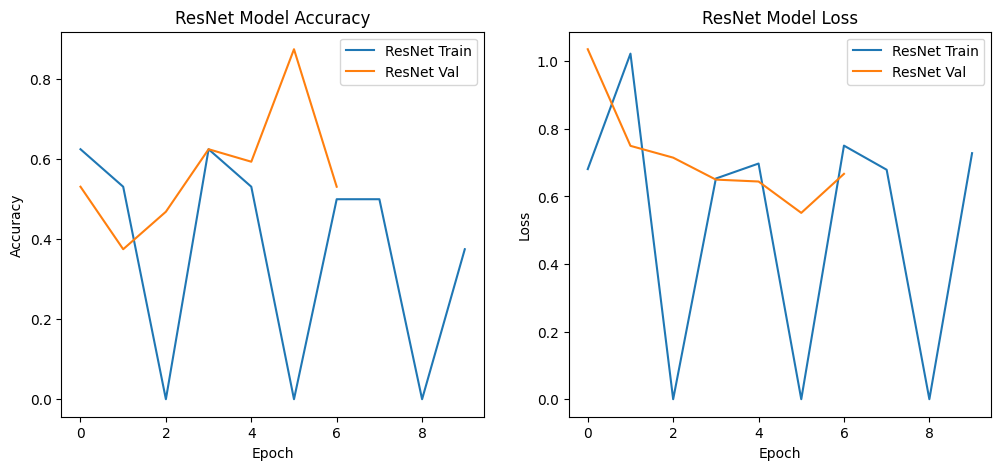

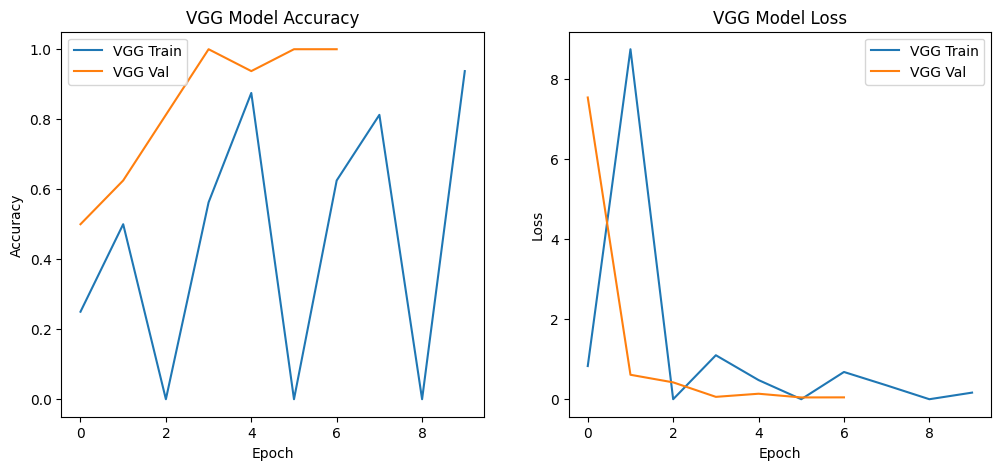

In [8]:
# Plot ResNet accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='ResNet Train')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Val')
plt.title('ResNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='ResNet Train')
plt.plot(history_resnet.history['val_loss'], label='ResNet Val')
plt.title('ResNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Plot VGG accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='VGG Train')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Val')
plt.title('VGG Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='VGG Train')
plt.plot(history_vgg.history['val_loss'], label='VGG Val')
plt.title('VGG Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
